In [38]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [7]:
haberman = pd.read_csv('haberman.csv')
#changing the column names
haberman.columns=['age','op_year','ax_nodes','survived']

In [8]:
print(haberman.shape)

(305, 4)


In [9]:
print(haberman.columns)

Index(['age', 'op_year', 'ax_nodes', 'survived'], dtype='object')


In [11]:
haberman['survived'].value_counts()

1    224
2     81
Name: survived, dtype: int64

In [ ]:
#224 patients survived 5 years or longer 
#81 patients died within 5 years
#It is a imbalanced dataset
# 305 datapoints,3 Variables,1 class-label,2 classes in total.
# Objective : To predict the survival probabality, whether the patient will live for more than 5 years or die within 5 years 
#  using the given dataset.
# To perform exploratory data analysis on the data, i.e 
# univariate and bivariate analysis and find the variable(s) for prediction of survival probablity.


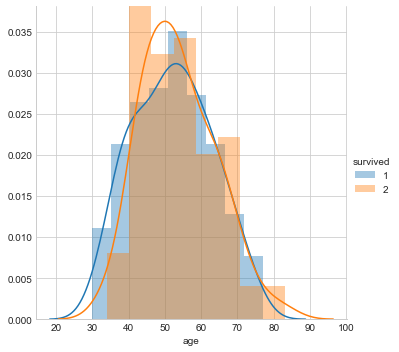

In [87]:
#Univariate analysis:
#perform pdf on each of the variables
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='survived',size=5)\
.map(sns.distplot,'age')\
.add_legend()
plt.show()

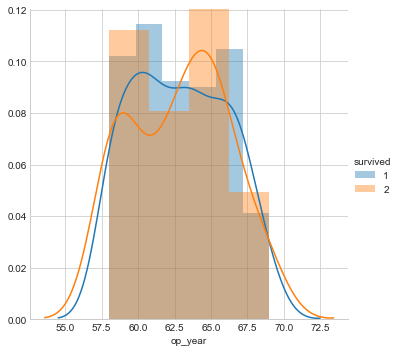

In [40]:
sns.FacetGrid(haberman,hue='survived',size=5)\
.map(sns.distplot,'op_year')\
.add_legend()
plt.show()

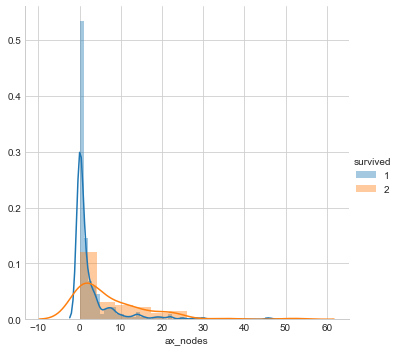

In [41]:
sns.FacetGrid(haberman,hue='survived',size=5)\
.map(sns.distplot,'ax_nodes')\
.add_legend()
plt.show()

In [ ]:
# Observations: 
# 1] As we can see, there is massive overlap between the pdfs' of the 2 classes in all 3 figures of the variables.
# 2] Hence, univariate analysis is extremely difficult in this case.
# 3] However, if univariate analysis is to be taken under consideration, 'axillary nodes' feature of the dataset can show
#    results slightly better than the remaining two, since it is the least overlapping.
#  It shows that 55% people who are having axillary nodes from 0-5,survived for more than 5 years.
#  While, in the same 0-5 axillary nodes gap,12% people died. 

In [45]:
#construction of CDF
#Setting all data points of survival status 1 to haberman_1 and same with haberman_2 
haberman_1 = haberman.loc[haberman["survived"]==1]
haberman_2 = haberman.loc[haberman["survived"]==2]

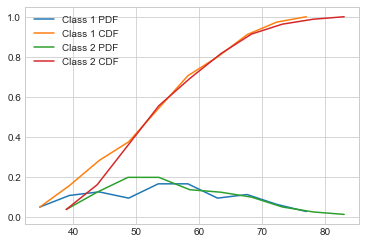

In [100]:
#Plots of CDF of ages for 2 classes
label="Class 1 PDF","Class 1 CDF","Class 2 PDF","Class 2 CDF"
counts,bin_edges = np.histogram(haberman_1['age'],bins=10,density=True)
pdf= counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
#plt.show()

counts,bin_edges = np.histogram(haberman_2['age'],bins=10,density=True)
pdf= counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)
plt.show()

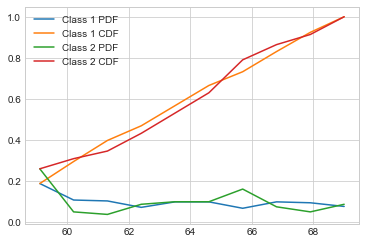

In [101]:
#Plots of CDF of op_year for 2 classes
label="Class 1 PDF","Class 1 CDF","Class 2 PDF","Class 2 CDF"
counts,bin_edges = np.histogram(haberman_1['op_year'],bins=10,density=True)
pdf= counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
#plt.show()

counts,bin_edges = np.histogram(haberman_2['op_year'],bins=10,density=True)
pdf= counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)
plt.show()

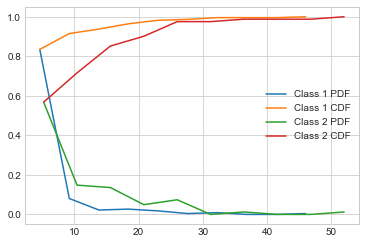

In [99]:
#Plots of CDF of ax_nodes for 2 classes
label="Class 1 PDF","Class 1 CDF","Class 2 PDF","Class 2 CDF"
counts,bin_edges = np.histogram(haberman_1['ax_nodes'],bins=10,density=True)
pdf= counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
#plt.show()

counts,bin_edges = np.histogram(haberman_2['ax_nodes'],bins=10,density=True)
pdf= counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)
plt.show()

In [ ]:
#Observations:
# 1] Here too, the overlapping of the cdfs' is massive.
# 2] For age cdf,people havig age less than 38 survived. Also, people older than 77 , died.
# 3] Operational year cdf overlaps massively. 
# 4] 82% people survived haiving 0-5 axillary nodes while 58% died.(Imblanced dataset)
# Also, people having axillary nodes more than 46, died.

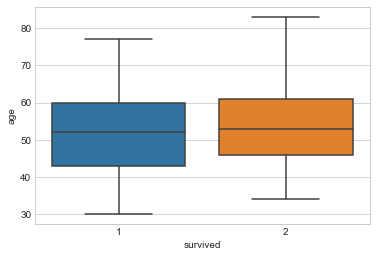

In [72]:
#Box Plots
sns.boxplot(x='survived',y='age',data=haberman)
plt.show()

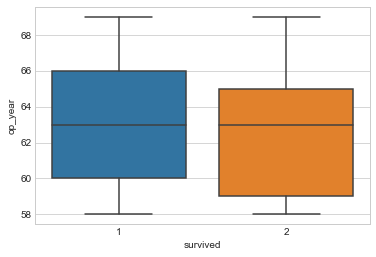

In [74]:
sns.boxplot(x='survived',y='op_year',data=haberman)
plt.show()

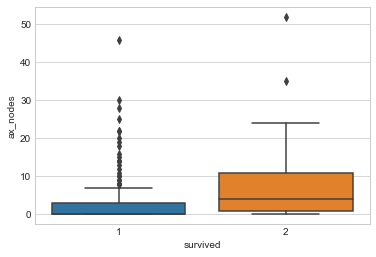

In [78]:
sns.boxplot(x='survived',y='ax_nodes',data=haberman)
plt.show()

In [ ]:
#BoxPlot Observations:
# 1] For age boxplot, people older than 82 years died.
# 2] The year of operation box plots of the 2 classes overlap totally.
# 3] For axillary nodes, the outliers are massive in both the plots. However,
# 3.1]75% people survived which have axillary nodes between 0-4.Almost 50% peple died within 0-5 range.
# 3.2]People having axillary nodes greater than 8 did not survive.However, it is a box plot. Hence the actual data may vary 
# according to the seaborn internal algorithm for plotting whiskers and the outliers.

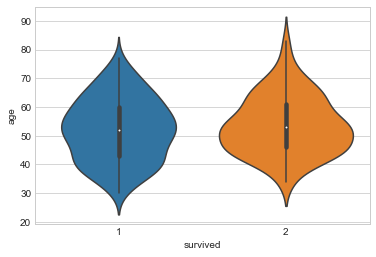

In [82]:
#Violin plots
sns.violinplot(x='survived',y='age',data=haberman,size=8)
plt.show()

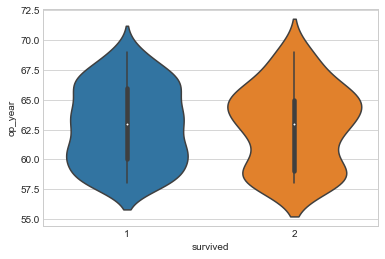

In [85]:
sns.violinplot(x='survived',y='op_year',data=haberman,size=8)
plt.show()


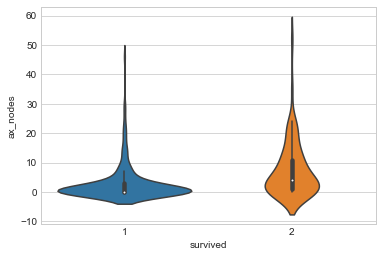

In [86]:
sns.violinplot(x='survived',y='ax_nodes',data=haberman,size=8)
plt.show()

In [ ]:
#Observations:
# Almost all the violin plots overlap with each other.
# Same as in previous cases, only axillary nodes plot is slighlty considerable.

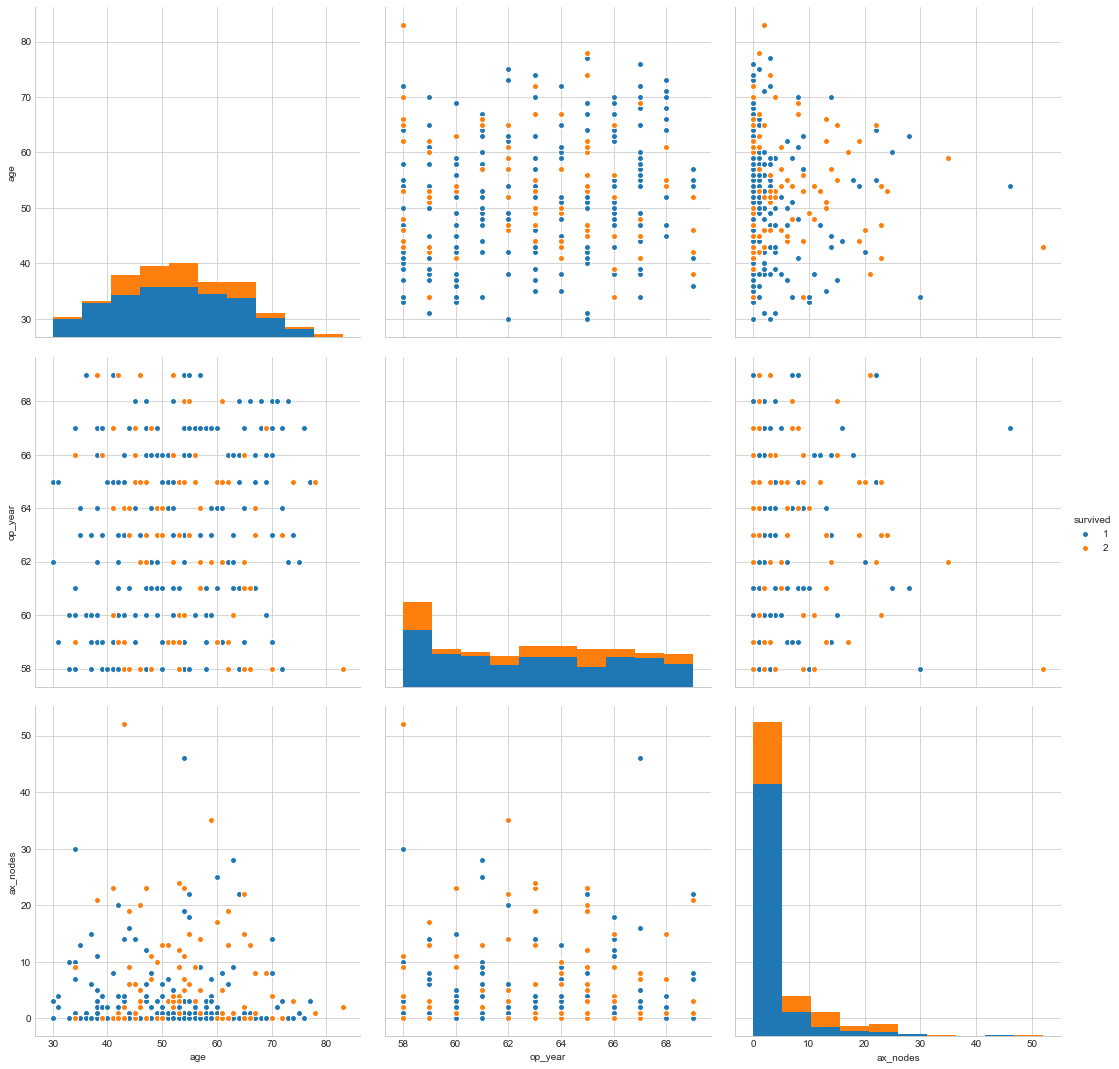

In [92]:
# Bivariate analysis: Scatter plot is between two variables. We can get the same with pairplot.
# Hence, No need to separately to do the scatter plot. 
# Skipping Scatter plot.Directly going to pair plots to check if combination of features is useful in classification.
#age, op_year and ax_nodes are the variables/features. Ignoring the 'survived' variable using 'vars' parameter.
sns.pairplot(haberman,hue='survived',vars=('age','op_year','ax_nodes'),size=5)
plt.show()

In [ ]:
#Observations:
#1]In pair plot , the features overlap with each other very much.
#2]It's difficult to anaylse or predict using such pattern.

In [ ]:
# Final Observations:
#1] Unable to find any specific feature or combinations of features useful to predict a person's survival
#2] The dataset is imbalanced.Observed that it affects the plots very much.
#3] The most useful feature (relatively) found among the three was the 'axillary nodes'.
#4] Researched about axillary nodes, apart from the dataset. Concluded that less the axillary nodes, more the survival probablity.
